In [1]:
# Importing libraries


import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time

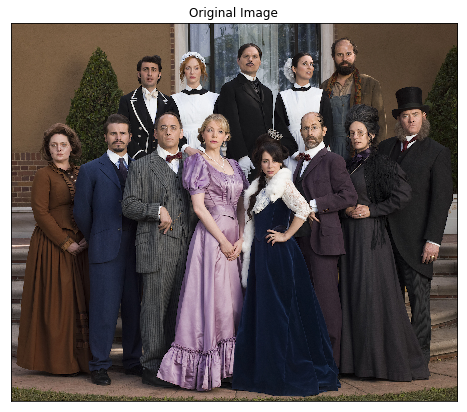

In [29]:
# Load in color image for face detection
image = cv2.imread('test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Number of faces detected: 13


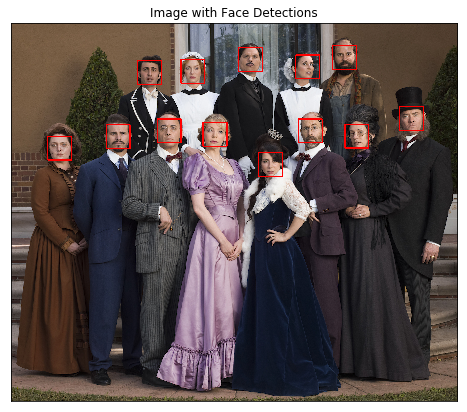

In [5]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

Number of eyes:  4


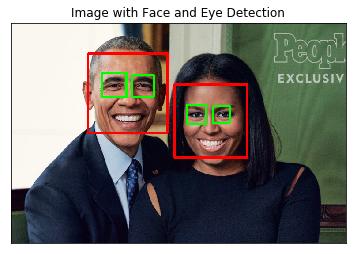

In [27]:
# with eye detections

image = cv2.imread('obamas4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converting the image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray)

# Eye detection 
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Detect the eyes in image
eyes = eye_cascade.detectMultiScale(gray)

image_with_detections = np.copy(image)

# Get the bounding box for each detected eye
print("Number of eyes: ", len(eyes))

for (x, y, w, h) in eyes:
    cv2.rectangle(image_with_detections, (x, y), (x+w, y+h), (0, 255, 0), 3)
# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

In [2]:
# Live face and eyes detection
import cv2

# Load the Haar cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Define function that will do detection
def detect(gray, frame):
  """ Input = greyscale image or frame from video stream
      Output = Image with rectangle box in the face
  """
  # Now get the tuples that detect the faces using above cascade
  faces = face_cascade.detectMultiScale(gray, 1.3, 10)
  # faces are the tuples of 4 numbers
  # x,y => upperleft corner coordinates of face
  # width(w) of rectangle in the face
  # height(h) of rectangle in the face
  # grey means the input image to the detector
  # 1.3 is the kernel size or size of image reduced when applying the detection
  # 5 is the number of neighbors after which we accept that is a face
  
  # Now iterate over the faces and detect eyes
  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    # Arguements => image, top-left coordinates, bottomright coordinates, color, rectangle border thickness
    
    # we now need two region of interests(ROI) grey and color for eyes one to detect and another to draw rectangle
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    # Detect eyes now
    eyes = eyes_cascade.detectMultiScale(roi_gray, 1.1, 5)
    # Now draw rectangle over the eyes
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 2)
      
  return frame

# Capture video from webcam 
video_capture = cv2.VideoCapture(0)
# Run the infinite loop
while True:
  # Read each frame
  _, frame = video_capture.read()
  # Convert frame to grey because cascading only works with greyscale image
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Call the detect function with grey image and colored frame
  canvas = detect(gray, frame)
  # Show the image in the screen
  cv2.imshow("Video", canvas)
  # Put the condition which triggers the end of program
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
video_capture.release()
cv2.destroyAllWindows()

In [1]:
# Loading Data

from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


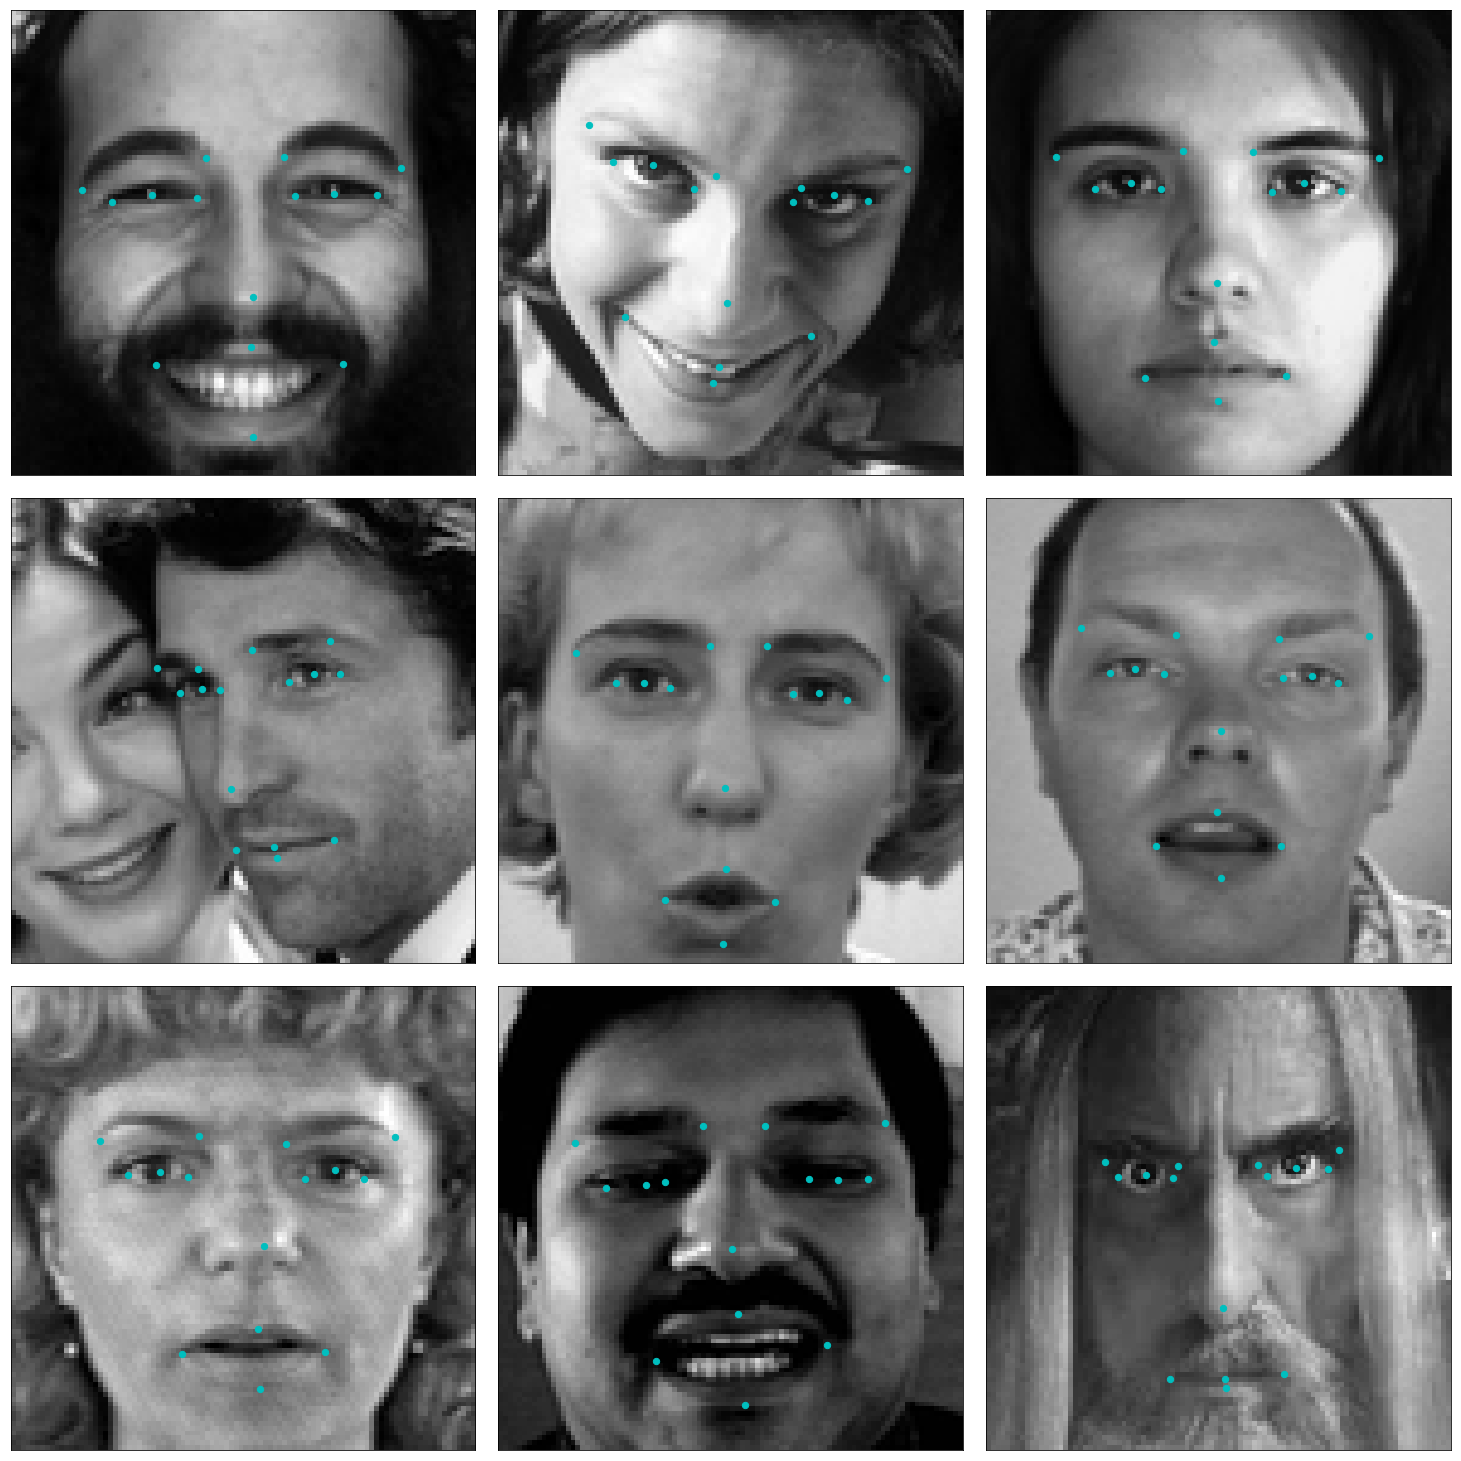

In [2]:
# Visualizing training data

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

In [3]:
print(X_train.shape, X_test.shape, y_train.shape)

(2140, 96, 96, 1) (1783, 96, 96, 1) (2140, 30)


In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense

In [5]:
# Import deep learning resources from Keras
## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

model = Sequential()
model.add(Convolution2D(64, 3, 3, input_shape=(X_train.shape[1:])))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='tanh'))


# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               17334400  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3870      
Total para

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(96, 96, 1...)`
  import sys
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [6]:
# Training and saving the model

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint   

## TODO: Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

## TODO: Save the model as model.h5
checkpointer = ModelCheckpoint(filepath='model.h5', verbose=1, 
                               save_best_only=True)
# train the model
hist = model.fit(X_train, y_train, batch_size=64, epochs=30,
          validation_split=0.2, callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 1712 samples, validate on 428 samples
Epoch 1/30
1712/1712 [==============================] - 63s 37ms/step - loss: 0.2959 - val_loss: 0.1415

Epoch 00001: val_loss improved from inf to 0.14150, saving model to model.h5
Epoch 2/30
1712/1712 [==============================] - 62s 36ms/step - loss: 0.2400 - val_loss: 0.0956

Epoch 00002: val_loss improved from 0.14150 to 0.09555, saving model to model.h5
Epoch 3/30
1712/1712 [==============================] - 64s 37ms/step - loss: 0.2218 - val_loss: 0.0851

Epoch 00003: val_loss improved from 0.09555 to 0.08508, saving model to model.h5
Epoch 4/30
1712/1712 [==============================] - 63s 37ms/step - loss: 0.2094 - val_loss: 0.0782

Epoch 00004: val_loss improved from 0.08508 to 0.07822, saving model to model.h5
Epoch 5/30
1712/1712 [==============================] - 62s 36ms/step - loss: 0.1968 - val_loss: 0.0702

Epoch 00005: val_loss improved from 0.07822 to 0.07018, saving model to model.h5
Epoch 6/30
1712/1712 [=====

dict_keys(['val_loss', 'loss'])


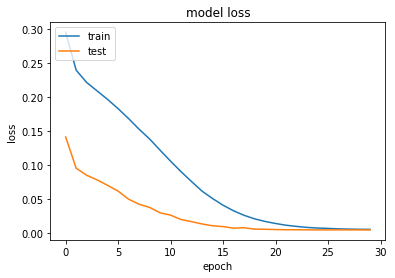

In [7]:
# Visualizing the training loss

## TODO: Visualize the training and validation loss of your neural network
print(hist.history.keys())

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

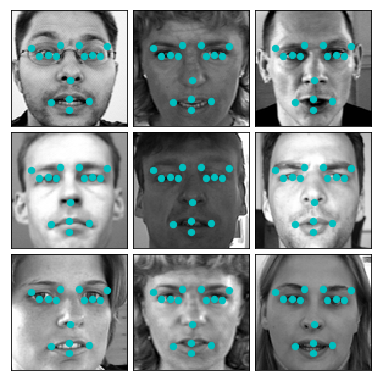

In [8]:
# Predicting the results

y_test = model.predict(X_test)
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

In [32]:
### TODO: Use the face detection code we saw in Section 1 with your trained conv-net 
## TODO : Paint the predicted keypoints on the test image
# Convert the RGB  image to grayscale

def detect_keypoints(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Detect the faces in image
    faces = face_cascade.detectMultiScale(gray, 2, 6)

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(image)

    num_face_keypoints = []
    
    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        face_img = image_with_detections[y:y+h, x:x+w, :]

        # Pre-process
        face_reshaped = cv2.resize(face_img, (96, 96))
        gray = cv2.cvtColor(face_reshaped, cv2.COLOR_RGB2GRAY)

        gray_normalized = gray / 255.
        gray_normalized = gray_normalized[np.newaxis, :, :, np.newaxis]

        # Predict
        key_points = model.predict(gray_normalized)

        key_points = key_points * 48 + 48

        # Re-normalize
        x_coords = key_points[0][0::2]
        y_coords = key_points[0][1::2]

        x_coords = x_coords * w / 96 + x
        y_coords = y_coords * h / 96 + y

        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

        num_face_keypoints.append((x_coords, y_coords))
        
    return num_face_keypoints, image_with_detections

In [34]:
# Load in color image for face detection
image = cv2.imread('obamas4.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

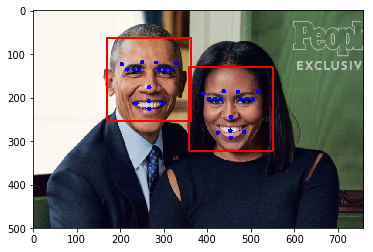

In [35]:
keypoints, image_with_detections = detect_keypoints(image)

for face in keypoints:
    for x, y in zip(face[0], face[1]):
        cv2.circle(image_with_detections, (x, y), 5, (0,0,255), -1)

plt.imshow(image_with_detections, cmap='gray') # plot the image

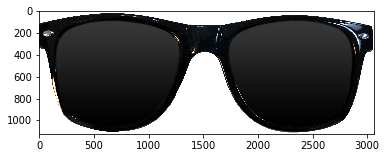

In [21]:
# Load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent each pixel in the image is
sunglasses = cv2.imread("sunglasses.png", cv2.IMREAD_UNCHANGED)

# Plot the image
plt.imshow(sunglasses)
#ax1.axis('off');

In [22]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

the alpha channel here looks like
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 the non-zero values of the alpha channel look like
(array([  17,   17,   17, ..., 1109, 1109, 1109]), array([ 687,  688,  689, ..., 2376, 2377, 2378]))


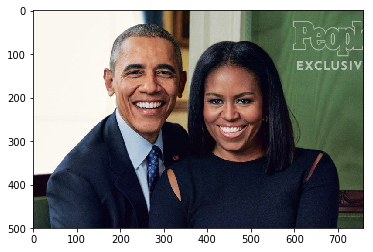

In [23]:
# Load in color image for face detection
image = cv2.imread('obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Plot the image
plt.imshow(image)

(500, 759, 4)


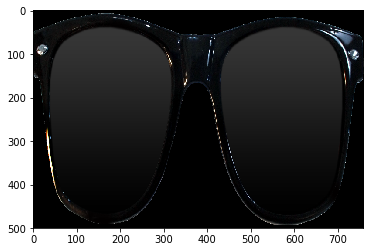

In [24]:
reshaped_sunglasses = cv2.resize(sunglasses, (image.shape[1], image.shape[0]))
print(reshaped_sunglasses.shape)
plt.imshow(reshaped_sunglasses[:,:,:3])

In [25]:
def warp(image, dest_points):

    src_points = np.float32([[0, 0],
                             [0, 499],
                             [758, 499],
                             [758, 0]])
    
    M = cv2.getPerspectiveTransform(src_points, dest_points)
    image_size = (image.shape[1], image.shape[0])
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    return warped

## (Optional) TODO: Use the face detection code we saw in Section 1 with your trained conv-net to put
## sunglasses on the individuals in our test image

def sunglasses_overlay(image):
    keypoints, image_with_detections = detect_keypoints(image)

    image_with_sunglasses = np.copy(image)
    output = np.copy(image)

    for person_points in keypoints:
        important_points_x, important_points_y = person_points
        h = (important_points_y[5] - important_points_y[9]) * 3

        dest_pts = np.float32([[important_points_x[9], important_points_y[9]],
                               [important_points_x[9], important_points_y[9]+h],
                               [important_points_x[7], important_points_y[9]+h],
                               [important_points_x[7], important_points_y[9]]])

        warped_sunglasses = warp(reshaped_sunglasses, dest_pts)

        mask = warped_sunglasses[:,:,:3]
        mask[mask == 0] = 255

        output[mask != 255] = mask[mask != 255]

    return output

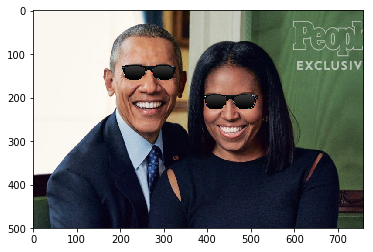

In [26]:
output = sunglasses_overlay(image)
plt.imshow(output)